In [1]:
%env CLEARML_WEB_HOST=https://app.clear.ml/
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
# Python 3.12
%env CLEARML_API_ACCESS_KEY=17EH8MKOUXFTCCY4ZNGB7KOEIGXU59
%env CLEARML_API_SECRET_KEY=I3XdWFGE-rw1-16wvP-F1uV6Uq143N7igmA6hAOetL8a8oj-4Xi32kYHC78lhjSCRzc

env: CLEARML_WEB_HOST=https://app.clear.ml/
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=17EH8MKOUXFTCCY4ZNGB7KOEIGXU59
env: CLEARML_API_SECRET_KEY=I3XdWFGE-rw1-16wvP-F1uV6Uq143N7igmA6hAOetL8a8oj-4Xi32kYHC78lhjSCRzc


In [2]:
import pandas as pd
import optbinning as ob
import sklearn as sl
from optbinning import OptimalBinning, BinningProcess
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import ydata_profiling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from ydata_profiling import ProfileReport
import category_encoders as ce
from clearml import Task, Logger, StorageManager, Dataset
import os
import pickle


In [3]:
trainingSample = Dataset.get(dataset_id='bb247b429ecf444ca29073aa42112d46')
testingSample = Dataset.get(dataset_id='6d5f1fcdd3a0482dac724b45e9e17300')
local_path_train = "D:/maga_1/машинное обучение/clearML/teaching_sample"
local_path_test= "D:/maga_1/машинное обучение/clearML/testing_sample"
local_path1 = trainingSample.get_mutable_local_copy(target_folder= local_path_train)
local_path2 = testingSample.get_mutable_local_copy(target_folder=local_path_test)
# print(local_path1)
trainingSample = pd.read_csv(local_path_train + "/teaching_sample.csv", index_col= False)
testingSample = pd.read_csv(local_path_test + "/testing_sample.csv", index_col= False)



'sdiskpart' object has no attribute 'maxfile'


In [4]:
os.remove(local_path_train + "/teaching_sample.csv")
os.remove(local_path_test + "/testing_sample.csv")

In [5]:
task2 = Task.init(project_name='MLOps project',
            task_name='Ridge_regression')
log = Logger.current_logger()

ClearML Task: created new task id=e22eac097c1d44138686f11a082fb8ae
2024-12-08 20:36:35,211 - clearml.Task - INFO - Storing jupyter notebook directly as code
ClearML results page: https://app.clear.ml/projects/64feb324c52d448791fa9e44bbf23ff8/experiments/e22eac097c1d44138686f11a082fb8ae/output/log


ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring


In [6]:
# trainingSample = pd.read_csv('D:/maga_1/ML/data/external/teaching_sample.csv', index_col= False)
# testingSample = pd.read_csv('D:/maga_1/ML/data/external/testing_sample.csv', index_col= False)
# #trainingSample1 = pd.read_csv('D:/maga_1/Машинное обучение/КлиментовАндрей_экспорт/for_binning.csv', index_col= False)
#trainingSample = trainingSample.sort_values('Клиент')
trainingEvents = trainingSample["событие"].values
#trainingSample2 = trainingSample1[["ClientID", "R"]]
#trainingSample = pd.merge(trainingSample, trainingSample2, how = "inner", left_on = 'Клиент', right_on = 'ClientID')
#trainingSample = trainingSample.drop('ClientID', axis = 1)
print(trainingSample)
print(trainingSample['давность'].mean())

            Клиент  доля суммы в послед визит  сумма послед  Сумма по клиенту  \
0      client30982                   1.000000           791               791   
1      client29086                   1.000000          1882              1882   
2      client27974                   1.000000          2883              2883   
3      client28103                   1.000000          1098              1098   
4      client17132                   1.000000         25981             25981   
...            ...                        ...           ...               ...   
39901   client9653                   0.008698           345             39663   
39902  client38911                   0.048990          1804             36824   
39903  client40126                   0.207332          3399             16394   
39904  client21972                   0.045139          7998            177185   
39905  client26552                   0.016754          2310            137878   

       Уник товар  Уник тов

[ 1629.5  2672.5  4002.5  4878.5  7308.5  8837.5 11504.5 14302.5 20998.
 31642.5 47613.5]
OPTIMAL


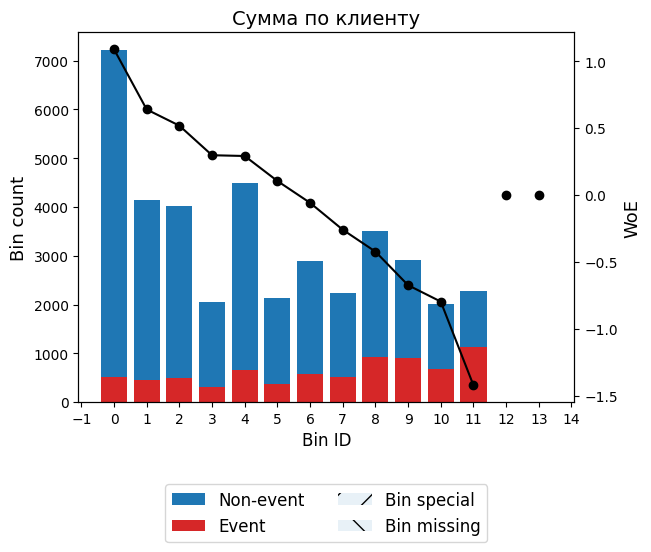

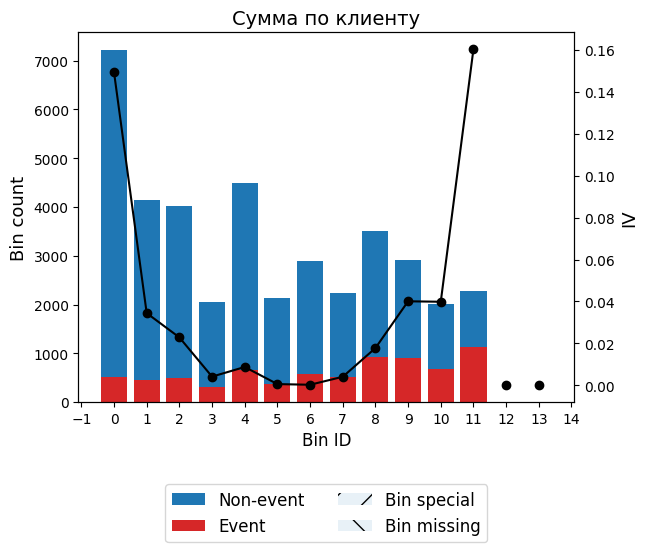

[  6.5  18.5  35.5  59.5  84.5 104.5 134.5 199.5 274.5 335.5 378.5 557.5]
OPTIMAL


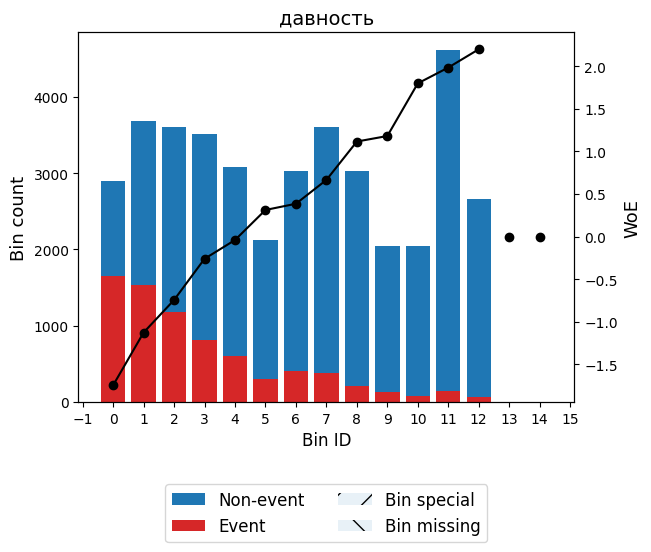

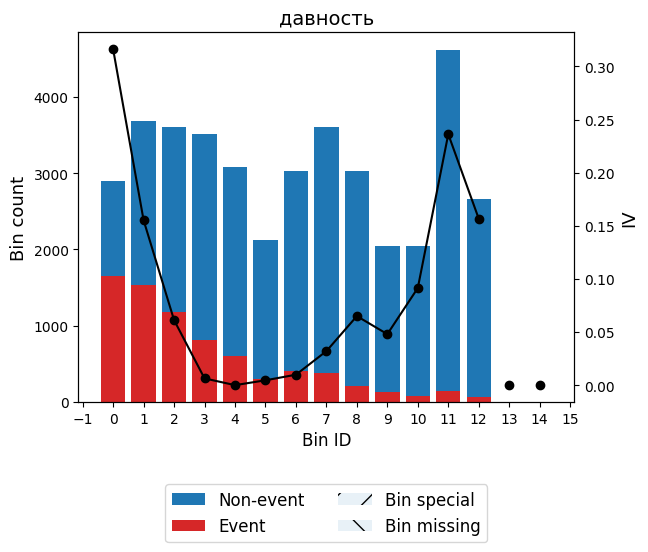

[ 2.5  5.5 10.5 15.5 20.5 26.5 33.5 43.5 72.5]
OPTIMAL


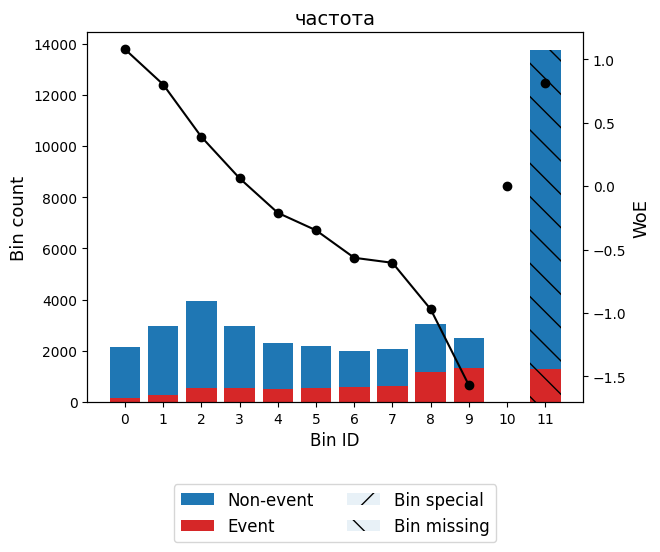

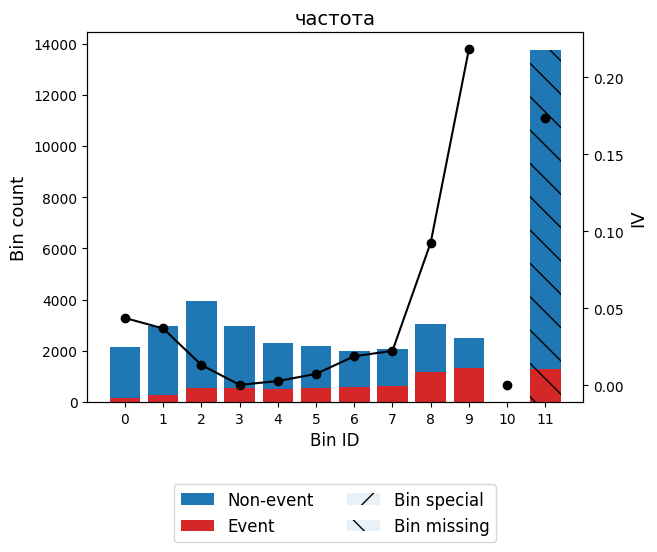

In [7]:
def featureBinning (variable):
    feature = trainingSample[variable].values
    optb = OptimalBinning(name=variable,
        dtype='numerical',
        solver='cp',
        min_n_bins=5,            # Minimum number of bins
        max_n_prebins=20,       # Maximum number of pre-bins
        min_bin_size=0.01,      # Lower minimum bin size
        max_bin_size=0.20)
    optb.fit(feature, trainingEvents)
    x_train = optb.transform(feature, metric='woe')
#print(feature)
    print(optb.splits)
    print(optb.status)
    binning_table = optb.binning_table
    binning_table.build()
    print(binning_table)
    binning_table.plot(metric="woe")
    binning_table.plot(metric="iv") 
    
variable = 'Сумма по клиенту'
featureBinning(variable)
variable = 'давность'
featureBinning(variable)
variable = 'частота'
featureBinning(variable)

# plt.xlabel('давность в днях')
# plt.ylabel('кол-во ')
# #trainingSample = trainingSample[trainingSample['событие'] == True]
# plt.bar(feature.unique(), trainingSample.groupby("давность")["событие"].count())
# plt.show()


In [8]:
def opt_binning(feature_name, feature_train, feture_test, event_train, event_test):
    
    optb = OptimalBinning(name=feature_name,
        dtype='numerical',
        solver='cp',
        min_n_bins=5,            # Minimum number of bins
               # Maximum number of pre-bins
        min_bin_size=0.05,      # Lower minimum bin size
        )
    optb.fit(feature_train, event_train)
    x_train = optb.transform(feature_train, metric='woe')
    #optb.fit(feture_test, event_test)
    x_test = optb.transform(feture_test, metric='woe')
    return x_train, x_test


In [9]:
names = ["доля суммы в послед визит", "Кол-во продаж", "доля визитов в вых", "частота", "Сумма по клиенту", "давность", "Сумма по любим группе", "Кол-во по любим группе"]
featureMultifactor = pd.DataFrame()
testFeatureMultifactor = pd.DataFrame()
for name in names:
    i = 0
    featureMultifactor_notBin = trainingSample[name].values
    testFeatureMultifactor_notBin = testingSample[name].values
    feature, test = opt_binning(name, featureMultifactor_notBin, testFeatureMultifactor_notBin,trainingSample['событие'],  testingSample['событие'])
    featureMultifactor.insert(i, name,feature)
    testFeatureMultifactor.insert(i, name,test)
    i = i +1


alpha = 1 # Примеры значений alpha
ridge_regression = linear_model.Ridge(alpha= alpha)
ridge_regression.fit(featureMultifactor, trainingSample['событие'])
y_pred = ridge_regression.predict(testFeatureMultifactor)
auc_ridge = metrics.roc_auc_score(testingSample['событие'], y_pred)
print(f'AUC Ridge regression: {auc_ridge:.2f}')

AUC Ridge regression: 0.80


In [10]:
log.report_single_value(name='AUC', value=auc_ridge)
log.report_single_value(name='alpha in regression', value=alpha)

d:\maga_1\ML\.venv\Lib\site-packages\clearml\utilities\plotlympl\renderer.py:210: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



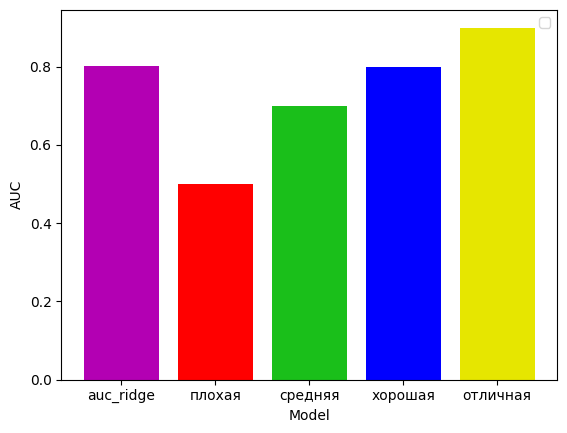

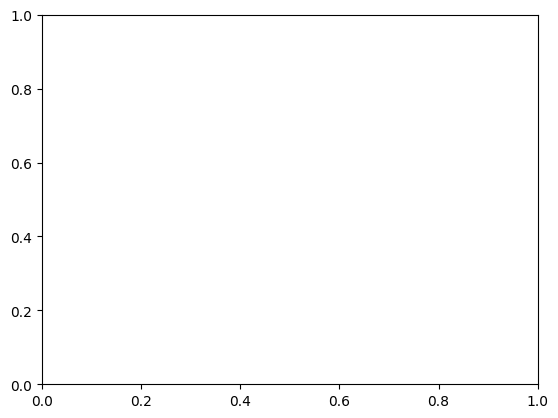

In [11]:
plt.bar("auc_ridge", auc_ridge, color = (0.7, 0, 0.7))
plt.bar("плохая", 0.5, color = (1.0, 0, 0))
plt.bar("средняя", 0.7, color = (0.1, 0.75, 0.1))
plt.bar("хорошая", 0.8, color = (0, 0, 1.0))
plt.bar("отличная", 0.9, color = (0.9, 0.9, 0))
plt.xlabel("Model")
plt.ylabel("AUC")
plt.show()
plt.savefig("Ridge.png")

In [12]:


task2.upload_artifact("Ridge.png", "image/png")
task2.upload_artifact("Alpha parametr", alpha)
with open('Ridge.pkl','wb') as f:
    pickle.dump(ridge_regression,f)
    pcl2 = pickle.dump(ridge_regression,f)
    
task2.upload_artifact(name='Ridge_Regression model', artifact_object=pcl2)
task2.close()